In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
import corenlp
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import cmudict
prondict = cmudict.dict()
# import nltk
# nltk.download('cmudict')
from nltk.corpus import cmudict
prondict = cmudict.dict()
import textstat

In [67]:
input_data = pd.read_csv('/home/vignesh/Downloads/QueryResults(3).csv')

In [68]:
input_data[0:1]

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ParentId.1,first_response,date_diff,hr_diff,relatedCounts
0,48126859,1,NaN,NaN,2018-01-06 11:27:23,NaN,0,442,<p>I want to try to use python to connect to M...,7815532.0,...,1,0,NaN,NaN,NaN,48126859,2018-12-17 08:03:07,345,8277,1


In [10]:
input_data['Tags'][0:100]

0                                       <python><mysql>
1                     <python><snmp><pysnmp><snmp-trap>
2                        <python><graph><slider><bokeh>
3                    <python><search><imap><imapclient>
4                                     <python><imaplib>
5            <python><jupyter-notebook><torch><pytorch>
6                                    <python><ssh><pip>
7                         <python><tensorflow><dataset>
8                                      <python><django>
9                             <python><logging><pytest>
10                                 <python><matplotlib>
11             <python><selenium><firefox><geckodriver>
12                                       <python><jira>
13               <python><pycharm><packages><traceback>
14                          <python><linux><python-2.7>
15    <python><python-3.x><drop-down-menu><widget><j...
16                                     <python><pandas>
17                        <python><html><beautif

In [4]:
input_data.columns

Index(['Id', 'PostTypeId', 'AcceptedAnswerId', 'ParentId', 'CreationDate',
       'DeletionDate', 'Score', 'ViewCount', 'Body', 'OwnerUserId',
       'OwnerDisplayName', 'LastEditorUserId', 'LastEditorDisplayName',
       'LastEditDate', 'LastActivityDate', 'Title', 'Tags', 'AnswerCount',
       'CommentCount', 'FavoriteCount', 'ClosedDate', 'CommunityOwnedDate',
       'ParentId.1', 'first_response', 'date_diff', 'relatedCounts'],
      dtype='object')

In [5]:
print(input_data['Body'][0:2])

0    <p>I want to try to use python to connect to M...
1    <p>I received an SNMP trap message in Python3,...
Name: Body, dtype: object


In [121]:
def numsyllables(word):
  try:
    numsyllables_pronlist = lambda l: len([s for s in l if str(s.encode('ascii', 'ignore').lower()[-1]).isdigit()])
    return list(set(map(numsyllables_pronlist, prondict[word.lower()])))
  except KeyError:
    return [0]

def word_tokenize1(text):
    words = word_tokenize(text)
    words_ret = []
    for w in words:
        if not (len(w)==1 and (not w.isalpha())):
            words_ret.append(w)
#     print(words_ret)
    return words_ret

def text_statistics(text):
  not_punctuation = lambda w: not (len(w)==1 and (not w.isalpha()))
  get_word_count = lambda text: len(list(filter(not_punctuation, word_tokenize(text))))
  get_sent_count = lambda text: len(sent_tokenize(text))  
  word_count = get_word_count(text)
  sent_count = get_sent_count(text)
  syllable_count = sum(map(lambda w: max(numsyllables(w)), word_tokenize(text)))
  return word_count, sent_count, syllable_count

def fleschreading(text):
    flesch_formula = lambda word_count, sent_count, syllable_count : 206.835 - (1.015*(word_count/sent_count)) - (84.6*(syllable_count/word_count))
    word_count, sent_count, syllable_count = text_statistics(text)
#     if word_count<1 or sent_count<1:
#         print(text)
#     print(text,"  ",sent_count," ",word_count)
    if sent_count>0 and word_count>0:
        flesch = flesch_formula(word_count, sent_count, syllable_count)
        if flesch<0.0:
            print(text," ",word_count," ",sent_count," ",syllable_count)
        return flesch
    else: return 0.0
#     not_punctuation = lambda w: not (len(w)==1 and (not w.isalpha()))
#     get_word_count = lambda text: len(filter(not_punctuation, word_tokenize(text)))
#     get_sent_count = lambda text: len(sent_tokenize(text))
#     numsyllables_pronlist = lambda l: len(filter(lambda s: isdigit(s.encode('ascii', 'ignore').lower()[-1]), l))




In [122]:
fleschreading("this is good")

this is good   3   1   8


-21.809999999999945

In [113]:
textstat.flesch_reading_ease("this is good")

119.19

In [142]:
number_of_code_tags = []
lines_of_code = []
lines_without_code = []
tags_count = []
flesch_reading_ease = []
flesch_reading_textstat = []
coleman_liau_index_textstat = []
gunning_fog_index_textstat = []
for index,i in input_data.iterrows():
    text_without_code = ""
    tags_str = i.Tags
    soup = BeautifulSoup(i.Body, 'html.parser')
    code = soup.findAll('code')
    paragraph = soup.findAll('p')
    tags_split = len(tags_str.split('><'))
    counter = 0
    paracounter = 0
    for c in code:
        try:
            counter += len(re.findall("\n", c.string))
        except:
            pass
        
    for c in paragraph:
        try:
            text_without_code += c.string
#             paracounter += len(re.findall("\n", c.string))
            paracounter += len(sent_tokenize(c.string))
        except:
            pass
    text_without_code = text_without_code.replace("\n"," ").strip()
#     flesch_reading_textstat.append(textstat.flesch_reading_ease(text_without_code))
#     flesch_reading_ease.append(fleschreading(text_without_code))
#     print(text_without_code)
    coleman_liau_index_textstat.append(textstat.coleman_liau_index(text_without_code))
    gunning_fog_index_textstat.append(textstat.gunning_fog(text_without_code))
    lines_of_code.append(counter)
    lines_without_code.append(paracounter)
    number_of_code_tags.append(len(code))
    tags_count.append(tags_split)

(array([   3.,  224.,   23., 2095.,  834.,   32.,    9.,    3.,    0.,
           3.]),
 array([-39.61 , -27.239, -14.868,  -2.497,   9.874,  22.245,  34.616,
         46.987,  59.358,  71.729,  84.1  ]),
 <a list of 10 Patch objects>)

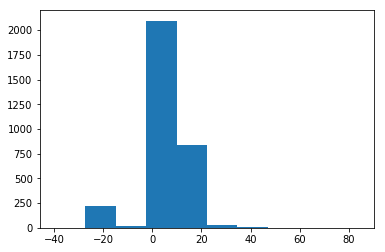

In [126]:
plt.hist(coleman_liau_index_textstat)

(array([3.034e+03, 1.760e+02, 1.000e+01, 3.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0.   ,  33.966,  67.932, 101.898, 135.864, 169.83 , 203.796,
        237.762, 271.728, 305.694, 339.66 ]),
 <a list of 10 Patch objects>)

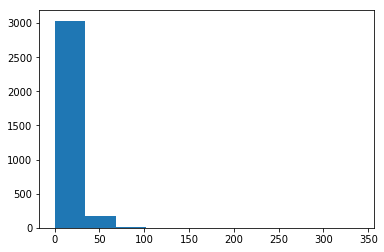

In [129]:
plt.hist(gunning_fog_index_textstat)

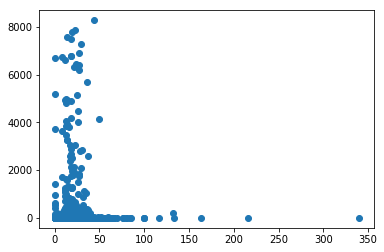

In [130]:
plt.scatter(gunning_fog_index_textstat,input_data['hr_diff'])

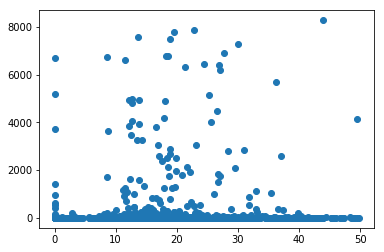

In [131]:
input_data['gunning_fog_index'] = gunning_fog_index_textstat
input_data_within_50 = input_data[input_data['gunning_fog_index']<=50]
plt.scatter(input_data_within_50['gunning_fog_index'],input_data_within_50['hr_diff'])

(array([277., 209., 842., 910., 474., 219., 107.,  72.,  51.,  18.]),
 array([ 0.   ,  4.981,  9.962, 14.943, 19.924, 24.905, 29.886, 34.867,
        39.848, 44.829, 49.81 ]),
 <a list of 10 Patch objects>)

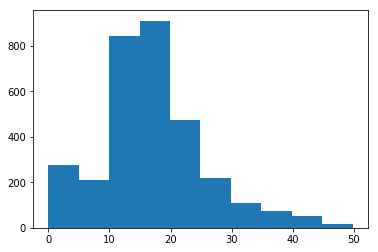

In [132]:
plt.hist(input_data_within_50.gunning_fog_index)

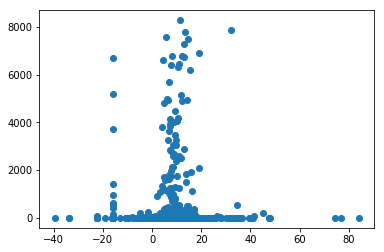

In [127]:
plt.scatter(coleman_liau_index_textstat,input_data['hr_diff'])

(array([7.759e+03, 9.360e+02, 3.370e+02, 1.190e+02, 6.100e+01, 3.700e+01,
        9.000e+00, 6.000e+00, 4.000e+00, 2.000e+00]),
 array([  0. ,  79.4, 158.8, 238.2, 317.6, 397. , 476.4, 555.8, 635.2,
        714.6, 794. ]),
 <a list of 10 Patch objects>)

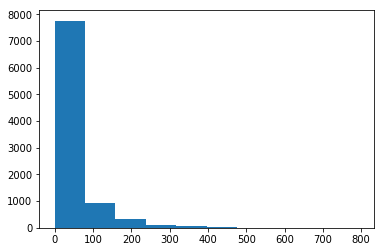

In [7]:
plt.hist(lines_of_code)

(array([8.211e+03, 8.150e+02, 1.700e+02, 4.000e+01, 1.800e+01, 6.000e+00,
        5.000e+00, 4.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0. ,  5.5, 11. , 16.5, 22. , 27.5, 33. , 38.5, 44. , 49.5, 55. ]),
 <a list of 10 Patch objects>)

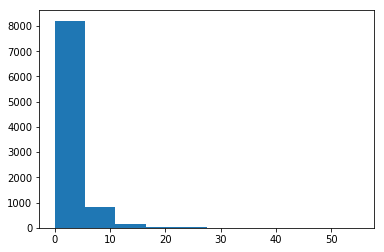

In [8]:
plt.hist(number_of_code_tags)

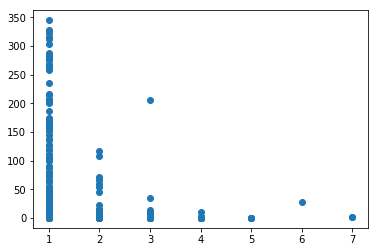

In [8]:
plt.scatter(input_data['relatedCounts'],input_data['hr_diff'])

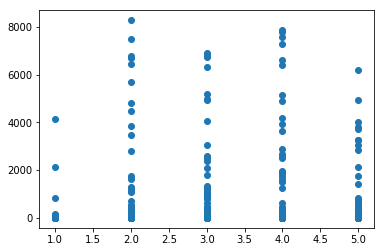

In [134]:
plt.scatter(tags_count,input_data['hr_diff'])

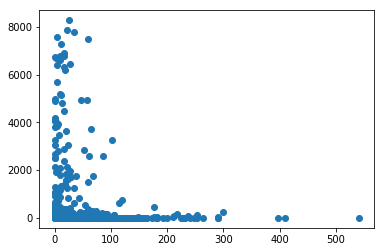

In [136]:
plt.scatter(lines_of_code,input_data['hr_diff'])

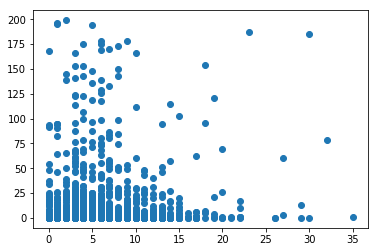

In [144]:
# input_data_within_20 = input_data[input_data['hr_diff']<=5]
input_data['lines_without_code'] = lines_without_code
input_data1 = input_data[input_data['hr_diff']<=200]
# input_data_filter_within_20 = input_data[input_data['lines_without_code']<=20]
plt.scatter(input_data1['lines_without_code'],input_data1['hr_diff'])

In [141]:
# input_data_within_20 = input_data[input_data['hr_diff']<=5]
input_data['lines_without_code'] = lines_without_code
input_data_filter_within_0 = input_data[input_data['lines_without_code']==0]
# plt.scatter(input_data_filter_within_20['lines_without_code'],input_data_filter_within_20['hr_diff'])
input_data_filter_within_0

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,FavoriteCount,ClosedDate,CommunityOwnedDate,ParentId.1,first_response,date_diff,hr_diff,relatedCounts,gunning_fog_index,lines_without_code
1,48275237,1,NaN,NaN,2018-01-16 06:29:19,NaN,0,2940,"<p>I received an SNMP trap message in Python3,...",4109962.0,...,NaN,NaN,NaN,48275237,2018-12-10 12:08:20,328,7878,1,22.78,0
2,48397330,1,NaN,NaN,2018-01-23 08:38:42,NaN,0,264,"<p>I already have a slider code from <a href=""...",8170983.0,...,NaN,NaN,NaN,48397330,2018-12-12 21:56:39,323,7765,1,19.60,0
3,48303136,1,53545312.0,NaN,2018-01-17 14:11:43,NaN,1,379,<p>I am using Python's <code>imapclient</code>...,2221281.0,...,NaN,NaN,NaN,48303136,2018-11-29 18:21:22,316,7588,1,13.67,0
4,48445618,1,NaN,NaN,2018-01-25 14:47:22,NaN,0,622,<p>There's an email blasted out every morning ...,8502642.0,...,NaN,NaN,NaN,48445618,2018-12-03 12:12:16,312,7486,1,18.90,0
5,48316706,1,NaN,NaN,2018-01-18 08:22:56,NaN,2,1451,<p>I installed pytorch using conda command whe...,8703540.0,...,1.0,NaN,NaN,48316706,2018-11-18 03:17:20,304,7291,1,30.03,0
6,48343669,1,53135936.0,NaN,2018-01-19 14:48:48,NaN,4,730,<p>I am controlling a remote unit over SSH and...,4106261.0,...,NaN,NaN,NaN,48343669,2018-11-03 22:08:50,288,6920,1,27.77,0
7,48351883,1,NaN,NaN,2018-01-20 01:54:38,NaN,3,414,"<p><a href=""https://i.stack.imgur.com/oyDNI.pn...",3534028.0,...,2.0,NaN,NaN,48351883,2018-10-29 21:23:37,282,6788,1,18.59,0
8,48312057,1,53017626.0,NaN,2018-01-18 00:19:57,NaN,5,180,"<p>Hello fellow programmers, </p>\n\n<p>I woul...",8957548.0,...,1.0,NaN,NaN,48312057,2018-10-27 00:00:11,282,6768,1,18.31,0
9,48190020,1,NaN,NaN,2018-01-10 14:50:52,NaN,2,426,"<p>I've seen this question: <a href=""https://s...",5691066.0,...,0.0,NaN,NaN,48190020,2018-10-19 00:55:39,282,6754,1,8.51,0
10,48509766,1,NaN,NaN,2018-01-29 20:52:05,NaN,0,1740,<p>I have a python program and am trying to pl...,4862280.0,...,NaN,NaN,NaN,48509766,2018-11-04 16:40:12,279,6692,1,0.00,0


(array([1558.,    0.,  707.,    0.,  169.,    0.,  105.,    0.,   51.,
          45.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

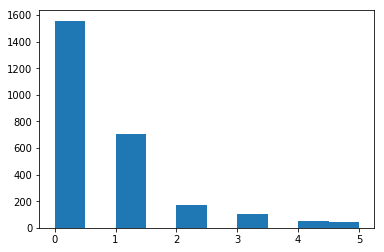

In [17]:
input_data_within_50 = input_data[input_data['hr_diff']<=5]
plt.hist(input_data_within_50['hr_diff'])

# input_data_within_10 = input_data[input_data['number_of_days']<=10]

(array([7199., 1101.,  250.,  170.,  100.,   72.,   60.,   53.,   29.,
          63.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

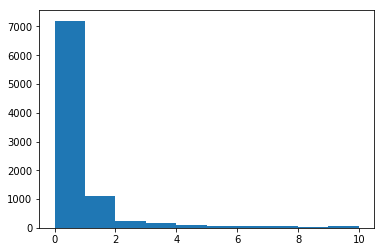

In [12]:
plt.hist(input_data_within_10['number_of_days'])

In [18]:
text = "Chris wrote a simple sentence that he parsed with Stanford CoreNLP. How are you?"

# We assume that you've downloaded Stanford CoreNLP and defined an environment
# variable $CORENLP_HOME that points to the unzipped directory.
# The code below will launch StanfordCoreNLPServer in the background
# and communicate with the server to annotate the sentence.
with corenlp.CoreNLPClient(timeout=1000000,annotators="ssplit") as client:
  ann = client.annotate(text)
  print(ann)


# You can access annotations using ann.
sentence = ann.sentence[0]

# The corenlp.to_text function is a helper function that
# reconstructs a sentence from tokens.
assert corenlp.to_text(sentence) == text

# You can access any property within a sentence.
# print(sentence.text)


text: "Chris wrote a simple sentence that he parsed with Stanford CoreNLP. How are you?"
sentence {
  token {
    word: "Chris"
    value: "Chris"
    before: ""
    after: " "
    originalText: "Chris"
    beginChar: 0
    endChar: 5
    tokenBeginIndex: 0
    tokenEndIndex: 1
    hasXmlContext: false
  }
  token {
    word: "wrote"
    value: "wrote"
    before: " "
    after: " "
    originalText: "wrote"
    beginChar: 6
    endChar: 11
    tokenBeginIndex: 1
    tokenEndIndex: 2
    hasXmlContext: false
  }
  token {
    word: "a"
    value: "a"
    before: " "
    after: " "
    originalText: "a"
    beginChar: 12
    endChar: 13
    tokenBeginIndex: 2
    tokenEndIndex: 3
    hasXmlContext: false
  }
  token {
    word: "simple"
    value: "simple"
    before: " "
    after: " "
    originalText: "simple"
    beginChar: 14
    endChar: 20
    tokenBeginIndex: 3
    tokenEndIndex: 4
    hasXmlContext: false
  }
  token {
    word: "sentence"
    value: "sentence"
    before: " "


AssertionError: 

In [13]:
import os
os.getenv("CORENLP_HOME")

'/home/vignesh/Documents/TextAnalytics/stanford-corenlp-full-2018-10-05'

In [5]:
os.environ["CORENLP_HOME"] = "/home/vignesh/Documents/TextAnalytics/stanford-corenlp-full-2018-10-05"

In [6]:
os.getenv("CORENLP_HOME")

'/home/vignesh/Documents/TextAnalytics/stanford-corenlp-full-2018-10-05'

In [30]:
len(ann.sentence)

2

In [32]:
import pyphen

In [33]:
dic = pyphen.Pyphen(lang='nl_NL')

In [41]:
dic.inserted('scala')

'sca-la'